Patch Daddy: 

TO DO

    outlier checks pre stats (AP width terrible)
    tau and sage normalised by V dif for analysis
    build IV curves for pre and post drug aplication
    finish meta loop for APP visuilisation
    handel if drug in/out is not specificed in APP file ... e.g control / put other data_type pAD to analise pAD from -100mV 
    change AP where it means Application to APP also in excel file !


DJ
   APP files compare V trace in PRE / APP / WASH and if >2SD the report depolarised from baseline/ hyperpolarised
   CLASIFY CELL RESPONCE + TIMESCALE OF RESPONCE 

    plotters for pAD: including PHASE PLOTS for each distribution see: https://www.biorxiv.org/content/10.1101/2022.08.09.503303v1  buildMeanAPFig()

    add resting_membrant_potential to tau and sag lists [value, V_steady_state, I_injected, resting_membrant_potential] 

    fix PCA, Histogram plotting in pAD_detector_old() : each should be own function like getorbuildMeanAPFig() uses 

    plot pAD  - DJ what ecactly are the peak locations?

DREAM LIST: 

APP files - EPSP / IPSP detector  PRE APP and WASH 


In [10]:
#imports, load feature df, set directory and colours

%load_ext autoreload
%autoreload 2


from utils.metabuild_functions import expandFeatureDF, loopCombinations_stats
from utils.plotter import getorbuildApplicationFig, loopbuildAplicationFigs, getorbuildAP_MeanFig, getorbuildAP_HistogramFig, getorbuildAP_PhasePlotFig, getorbuildAP_PCAFig #getorbuildAP_RateOfDepolFig #DJ?
from utils.base_utils import *
import openpyxl
import pandas as pd
import numpy as np
import os
import warnings

#CONSTANTS
ROOT = os.getcwd() #This gives terminal location (terminal working dir)
INPUT_DIR = f'{ROOT}/input'
OUTPUT_DIR = f'{ROOT}/output'
CACHE_DIR = f'{ROOT}/cache'

filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/cache/feature_df_py SUBCACHE


In [4]:

expanded_df = getorbuildExpandedDF(filename, 'feature_df_expanded', expandFeatureDF, from_scratch=True)

# cell_df = getCellDF(expanded_df, 'TLX230416c', data_type='AP')



BUILDING "feature_df_expanded"
AP type file
JJB210406/t11


KeyboardInterrupt: 

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "TLX230411a Application Figure"
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX230411a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX230411a.png


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:81: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  try:


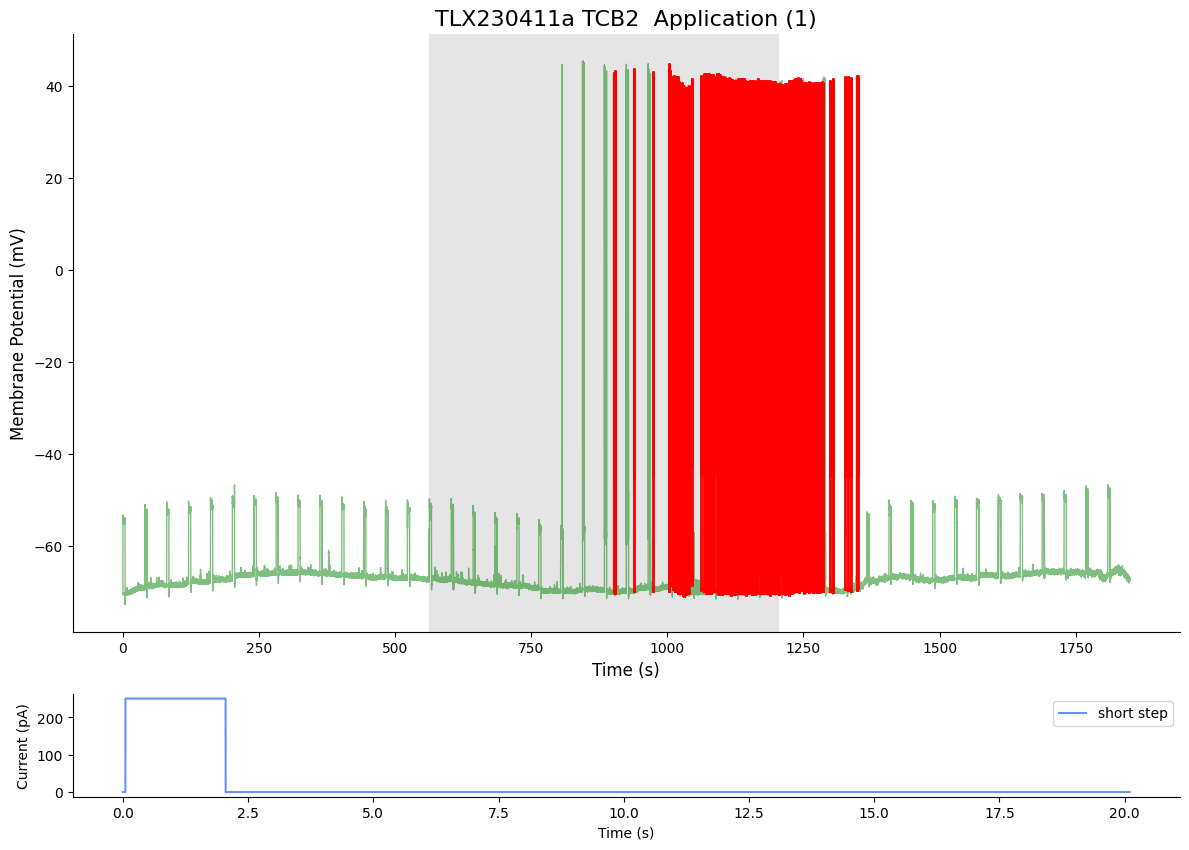

In [6]:
#APPLICATION TRACE PLOTTING

#following currently brokem for pAD_locs = True as pAD df doesnt have upshoot_locs col? DJ ERROR
getorbuildApplicationFig(filename, 'TLX230411a', from_scratch=True) #gets full expanded_df and slices it
# getorBuildApplicationFig(filename, cell_df, from_scratch=False) #faster as doesnt need full expanded_df



#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell



GETTING "feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "TLX230411a Mean APs Figure"


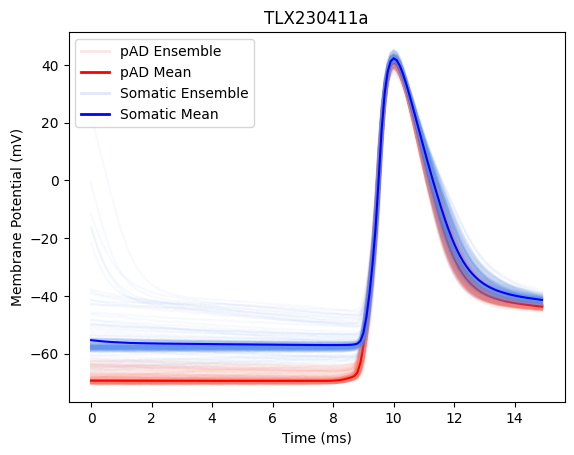

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Mean_APs/TLX230411a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Mean_APs/TLX230411a.png
GETTING "feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "TLX230411a AP Histogram Figure"


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:186: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  V      = V_array


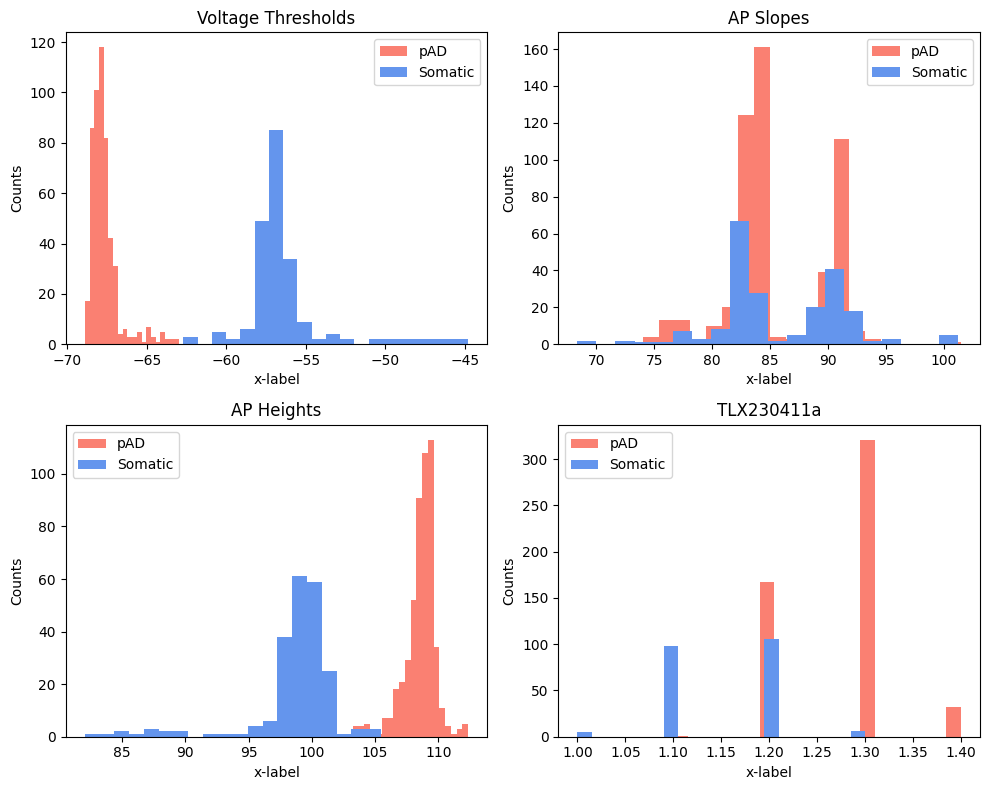

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram_APs/TLX230411a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram_APs/TLX230411a.png


/Users/jasminebutler/Desktop/IGOR_phd/utils/plotter.py:358: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  None.


In [7]:
#pAD PLOTTING 

#EXAMPLE USE
# getorbuildAP_HistogramFig(filename, cell_ID_or_cell_df, from_scratch=True)
#BROKEN
# getorbuildAP_PhasePlotFig(filename, cell_ID_or_cell_df, from_scratch=True)
# getorbuildAP_PCAFig(filename, cell_ID_or_cell_df, from_scratch=None)
# getorbuildAP_RateOfDepolFig(filename, cell_ID_or_cell_df, from_scratch=None)


#BROKEN ISH
getorbuildAP_MeanFig(filename, 'TLX230411a', from_scratch=True) #cell_ID_or_cell_df
#e.g.
# getorbuildAP_MeanFig(filename, 'TLX210328a', from_scratch=True) #cell_ID_or_cell_df
#FIX ME: 'CTG230222a' , 'CTG230220c' 
#ONLY PLOTTING MEAN:  'TLX210328a'


getorbuildAP_HistogramFig(filename, 'TLX230411a', from_scratch=True) #cell_ID_or_cell_df


In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loopCombinations_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. LSD: Custom statistical test, P_val:1.144e-02
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. LSD: Custom statistical test, P_val:1.385e-02
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_CTG_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L6b_DRD with CONTROL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_DRD_pAD_vs_somatic_APs_DMT.png
Insuficient data for L6b_DRD with LSD application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


,folder_file,cell_ID,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series_Mohm,...,mean_AP_slope_file,mean_AP_width_file,mean_AP_latency_file,max_firing_cell_drug,voltage_threshold_cell_drug,AP_height_cell_drug,AP_slope_cell_drug,AP_width_cell_drug,AP_latency_cell_drug,first_drug_AP
907,JJB230509/t11,CBL230509b,FP,PRE,1,0,NaN,NaN,NaN,47.0,...,82.629766,704.375000,0.975000,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
908,JJB230509/t12,CBL230509b,FP,PRE,2,0,NaN,NaN,NaN,44.0,...,90.947657,841.000000,0.866667,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
909,JJB230509/t13,CBL230509b,FP,PRE,3,0,NaN,NaN,NaN,44.0,...,87.167019,789.828571,0.871429,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
906,JJB230509/t8,CBL230509a,AP,TCB2,1,1,21.0,35.0,short step,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,JJB230509/t15,CBL230509b,AP,TCB2,1,1,9.0,22.0,short step,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,JJB230126/t42,DRD230126c,FP_AP,WASH,11,1,8.0,NaN,NaN,NaN,...,44.853426,767.400000,1.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,JJB230126/t43,DRD230126c,FP_AP,WASH,12,1,10.0,NaN,NaN,NaN,...,45.551643,685.200000,1.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,JJB230301/t19,DRD230301a,FP_AP,WASH,14,1,NaN,NaN,NaN,NaN,...,65.450391,843.366667,1.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,JJB230301/t20,DRD230301a,FP_AP,WASH,15,1,NaN,NaN,NaN,NaN,...,63.155565,884.650000,1.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
